# BIOCHAM Tutorial 
<img src="logo.png" width=100>
# *back to the future along the development timeline (2003 v0 - 2017 v4)*

<img src="evolved.png" width=300>

François Fages, Sylvain Soliman, INRIA Saclay Ile de France, Sep. 2017



## The Biochemical Abstract Machine vision:
- View cells as machines and biochemical reactions as programs
- The programs of a cell are implicitly represented by the set of all possible reactions over the universe of proteins encoded in its genome
- Develop program verification concepts for biochemical reaction networks (CRNs)
- Master the complexity of biological networks with programming concepts
- Develop robust design principles and synthesis methods for CRNs

## v0, 2003:
- CRN reaction rule-based language
- **Boolean semantics** and **symbolic model-checking** (NuSMV) CTL

## v1, 2004:
- CRN reaction rates, SBML support
- **Continuous semantics** (ODE)

## Michaelis-Menten reaction forever

In [1]:
present(a). present(c).

In [1]:
a+c => c+b.

In [1]:
present(s). present(e).

In [1]:
s+e => se.

In [1]:
se => e+s.

In [1]:
se => e+p.

In [1]:
list_model.

a=[c]=>b.
s+e=>se.
se=>e+s.
se=>e+p.
present(a).
present(c).
present(s).
present(e).


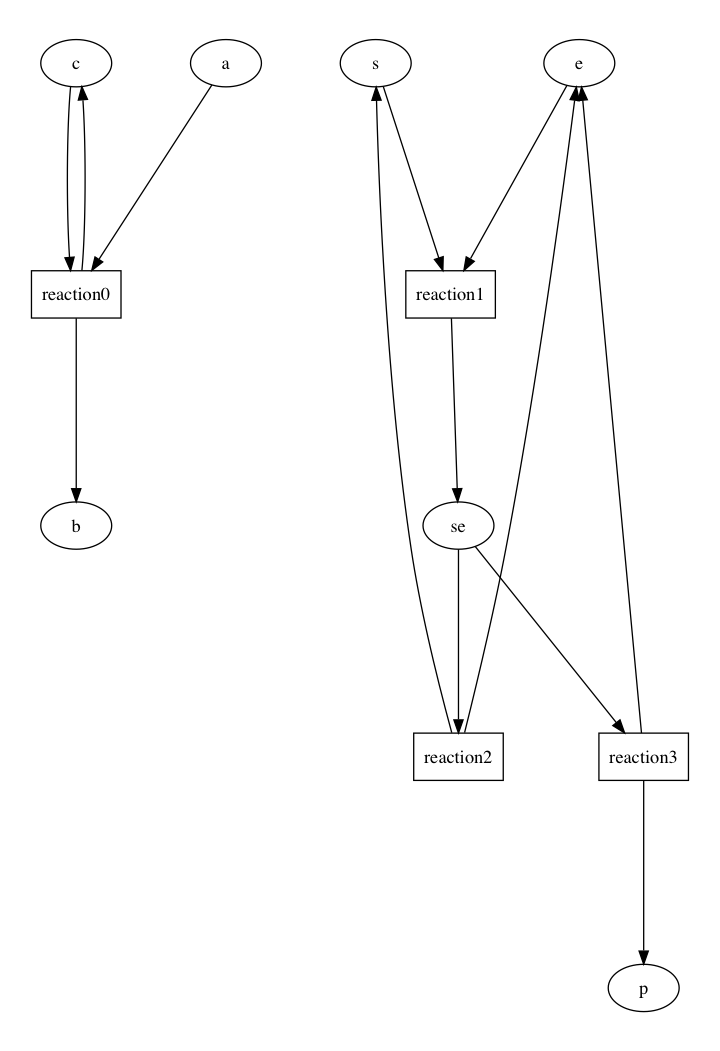

In [1]:
option(force_up: present). draw_reactions.

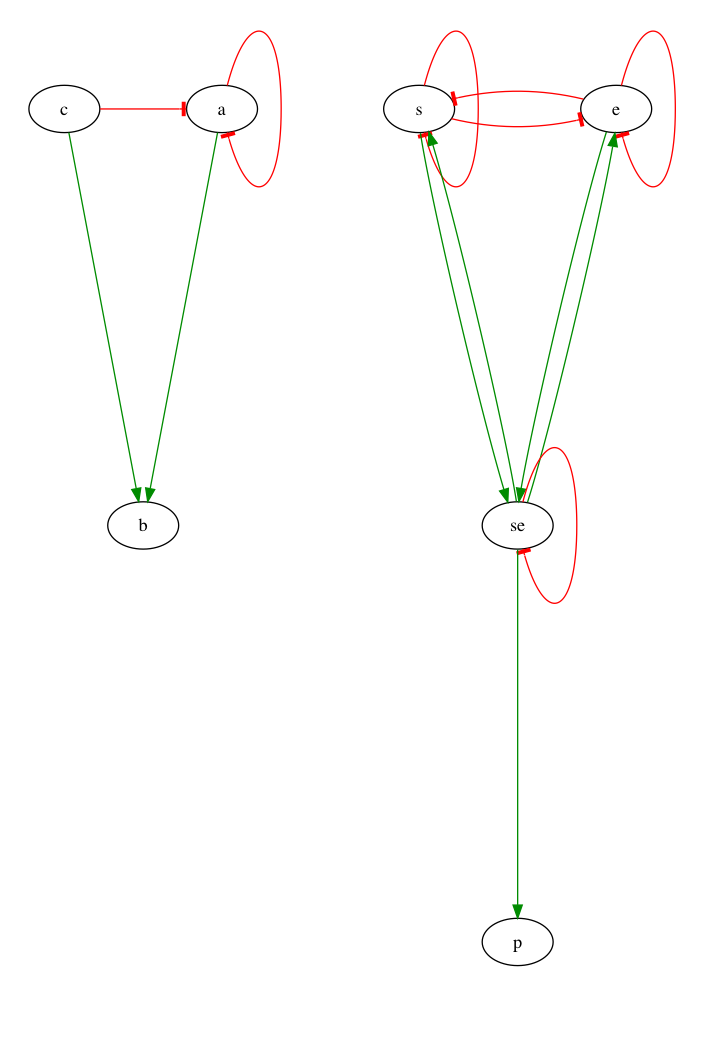

In [1]:
draw_influences.

In [1]:
list_ode.

[0] d(p)/dt=se
[1] d(e)/dt=2*se-s*e
[2] d(se)/dt=s*e-2*se
[3] d(s)/dt=se-s*e
[4] d(b)/dt=c*a
[5] d(c)/dt=0
[6] d(a)/dt= - (c*a)


In [1]:
search_conservations.

a+b
p+s+se
e+se
3 complex invariant(s)
c


In [1]:
numerical_simulation(time: 20). plot(show:{a,c,s,e}).

In [1]:
expand_ctl(reachable(stable(x))).

EF(AG(x))


In [1]:
expand_ctl(reachable(steady(x))).

EF(EG(x))


In [1]:
generate_ctl.

reachable(stable(b))
reachable(stable(c))
reachable(stable(e))
reachable(stable(p))
reachable(steady(a))
reachable(steady(s))
reachable(steady(se))
oscil(e)
oscil(s)
oscil(se)


In [1]:
reduce_model.

removed []


In [1]:
delete_ctl(oscil(e)). delete_ctl(oscil(s)). delete_ctl(oscil(se)).

In [1]:
reduce_model.

removed [(se=>e+s)]


<img=src="NatureReviews_MolCellBiol_mapk.jpg" width=400>

![HF1996pnas](HF1996pnas_header.jpg)

<img src="HF1996pnas_cascade.jpg" width=600>

In [1]:
load('library:biomodels/BIOMD0000000009.xml').

In [1]:
list_model.

r1a__a1*E1*KKK for KKK+E1=>E1_KKK.
r1a__d1*E1_KKK for E1_KKK=>KKK+E1.
r1b__k2*E1_KKK for E1_KKK=>E1+P_KKK.
r2a__a2*E2*P_KKK for P_KKK+E2=>E2_P_KKK.
r2a__d2*E2_P_KKK for E2_P_KKK=>P_KKK+E2.
r2b__k2*E2_P_KKK for E2_P_KKK=>E2+KKK.
r3a__a3*KK*P_KKK for KK+P_KKK=>P_KKK_KK.
r3a__d3*P_KKK_KK for P_KKK_KK=>KK+P_KKK.
r3b__k3*P_KKK_KK for P_KKK_KK=>P_KK+P_KKK.
r4a__a4*P_KK*KKPase for P_KK+KKPase=>KKPase_P_KK.
r4a__d4*KKPase_P_KK for KKPase_P_KK=>P_KK+KKPase.
r4b__k4*KKPase_P_KK for KKPase_P_KK=>KK+KKPase.
r5a__a5*P_KK*P_KKK for P_KK+P_KKK=>P_KKK_P_KK.
r5a__d5*P_KKK_P_KK for P_KKK_P_KK=>P_KK+P_KKK.
r5b__k5*P_KKK_P_KK for P_KKK_P_KK=>PP_KK+P_KKK.
r6a__a6*PP_KK*KKPase for PP_KK+KKPase=>KKPase_PP_KK.
r6a__d6*KKPase_PP_KK for KKPase_PP_KK=>PP_KK+KKPase.
r6b__k6*KKPase_PP_KK for KKPase_PP_KK=>P_KK+KKPase.
r7a__a7*K*PP_KK for K+PP_KK=>PP_KK_K.
r7a__d7*PP_KK_K for PP_KK_K=>K+PP_KK.
r7b__k7*PP_KK_K for PP_KK_K=>P_K+PP_KK.
r8a__a8*P_K*KPase for P_K+KPase=>KPase_P_K.
r8a__d8*KPase_P_K for KPase_P_K=>P_K+KP

In [1]:
numerical_simulation(time: 100). plot.

The *dose-response* (input-output) diagram reveals the *switch-like behavior* of the MAPK network and its functions
of analog-digital converter (noise filtering and ultrasensitivity) and signal amplifier:

In [1]:
dose_response(E1, 1e-6, 1e-4, time:10000, show:{PP_K, PP_KK, P_KKK}).

In the Boolean semantics, the enumeration of Computation Tree Logic (CTL) temporal properties by model-checking suggests *possibilities of oscillations*.

In [1]:
generate_ctl.

reachable(steady('E1'))
reachable(steady('E1_KKK'))
reachable(steady('E2'))
reachable(steady('E2_P_KKK'))
reachable(steady('K'))
reachable(steady('KK'))
reachable(steady('KKK'))
reachable(steady('KKPase'))
reachable(steady('KKPase_PP_KK'))
reachable(steady('KKPase_P_KK'))
reachable(steady('KPase'))
reachable(steady('KPase_PP_K'))
reachable(steady('KPase_P_K'))
reachable(steady('PP_K'))
reachable(steady('PP_KK'))
reachable(steady('PP_KK_K'))
reachable(steady('PP_KK_P_K'))
reachable(steady('P_K'))
reachable(steady('P_KK'))
reachable(steady('P_KKK'))
reachable(steady('P_KKK_KK'))
reachable(steady('P_KKK_P_KK'))
checkpoint2('E1','E1_KKK')
checkpoint2('E2','E1_KKK')
checkpoint2('K','E1_KKK')
checkpoint2('KK','E1_KKK')
checkpoint2('KKK','E1_KKK')
checkpoint2('KKPase','E1_KKK')
checkpoint2('KPase','E1_KKK')
checkpoint2('E1','E2_P_KKK')
checkpoint2('E1_KKK','E2_P_KKK')
checkpoint2('E2','E2_P_KKK')
checkpoint2('K','E2_P_KKK')
checkpoint2('KK','E2_P_KKK')
checkpoint2('KKK','E2_P_KKK')
checkpoint

Model reduction preserving the temporal properties above shows that the dephosphorylaiton reactions are not necessary to the reachability and oscillation properties.

In [1]:
reduce_model.

removed [(r1a__d1*'E1_KKK'for'E1_KKK'=>'KKK'+'E1'),(r2a__d2*'E2_P_KKK'for'E2_P_KKK'=>'P_KKK'+'E2'),(r3a__d3*'P_KKK_KK'for'P_KKK_KK'=>'KK'+'P_KKK'),(r4a__d4*'KKPase_P_KK'for'KKPase_P_KK'=>'P_KK'+'KKPase'),(r5a__d5*'P_KKK_P_KK'for'P_KKK_P_KK'=>'P_KK'+'P_KKK'),(r6a__d6*'KKPase_PP_KK'for'KKPase_PP_KK'=>'PP_KK'+'KKPase'),(r7a__d7*'PP_KK_K'for'PP_KK_K'=>'K'+'PP_KK'),(r8a__d8*'KPase_P_K'for'KPase_P_K'=>'P_K'+'KPase'),(r9a__d9*'PP_KK_P_K'for'PP_KK_P_K'=>'P_K'+'PP_KK'),(r10a__d10*'KPase_PP_K'for'KPase_PP_K'=>'PP_K'+'KPase')]


In [1]:
numerical_simulation(time: 100).

In [1]:
plot(show: {rel_K_PP_max, KK_PP_norm, KKK_P_norm}).

In [1]:
dose_response(E1, 1e-6, 1e-4, time:100, show:rel_K_PP_max).

## 2005:
- **Quantitative model-checking LTL(R)**
- **Parameter search w.r.t. LTL(R) specification** by scanning (2-3 parameters)
- Events
- Model revision from CTL specifications
- GUI in Java

## v2, 2006:
- Static locations
- Petri net invariants as conservation laws for the continuous semantics

## v3, 2008:
- **Trace analyses** by FO-LTL(Rlin) constraint solving
- **Parameter search up to 50-100 parameters** by CMA-ES w.r.t. FO-LTL(Rlin) 
- **Robustness measure** w.r.t. FO-LTL(Rlin) properties
- **Stochastic semantics** (Continuous Time Markov Chain)
- **Hierarchy of semantics**

<div id="LV"></div>
## Lotka-Volterra enzymatic predators

In [1]:
clear_model.

In [1]:
present(A). present(B).

In [1]:
k1*A*B for A+B => 2*B.

In [1]:
k2*A for A => 2*A.

In [1]:
k3*B for B => _.

In [1]:
parameter(k1=2, k2=2, k3=1).

In [1]:
list_model.

k1*A*B for A=[B]=>B.
k2*A for _=[A]=>A.
k3*B for B=>_.
present(A).
present(B).
parameter(
  k1 = 2,
  k2 = 2,
  k3 = 1
).


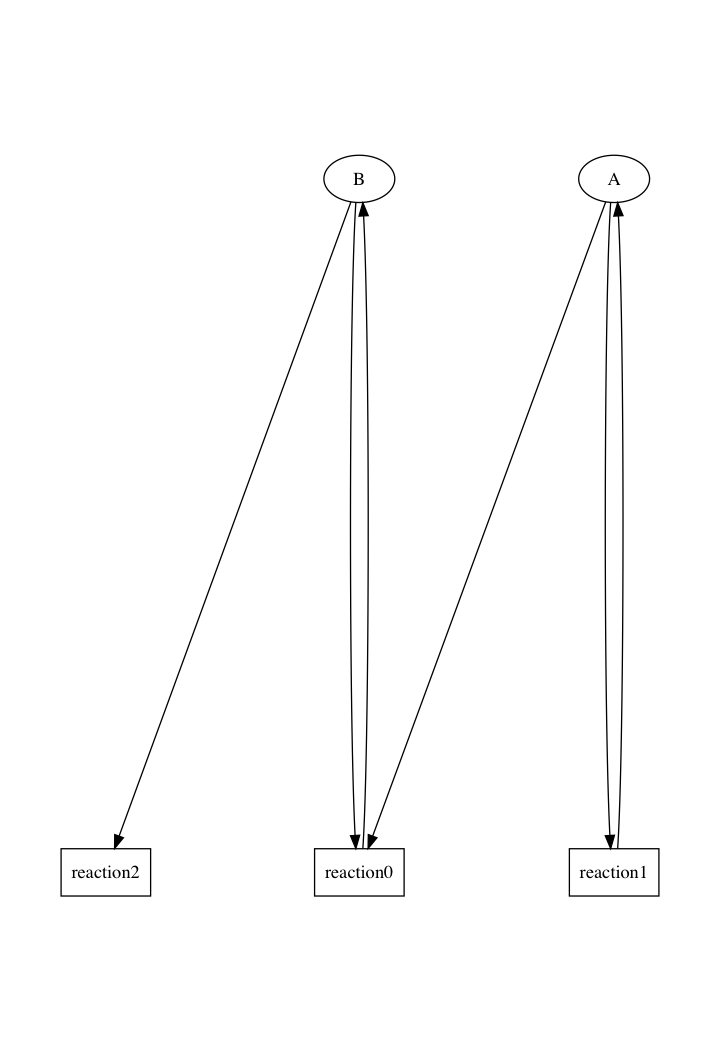

In [1]:
draw_reactions.

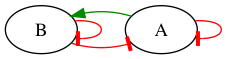

In [1]:
draw_influences.

In [1]:
list_ode.

[0] d(B)/dt=k1*A*B-k3*B
[1] d(A)/dt=k2*A-k1*A*B


In [1]:
export_ode('LVr.ode').

In [1]:
search_conservations.

No complex invariant found


In [1]:
option(time:40).

In [1]:
numerical_simulation. plot.

In [1]:
plot(show:B, against:A).

In [ ]:
%slider k1 k2 k3

### Amplitude and period properties in quantitative temporal logic FO-LTL(Rlin)

<img src="amplitude.png" width=200>   

<img src="period.png" width=200>

In [44]:
validity_domain(amplitude(A,a)). validity_domain(amplitude(B,b)).

a=0.796659
b=1.115193


In [45]:
expand_ltl(amplitude(A,a)).

exists(Minimum,exists(Maximum,G(A<=Maximum)/\F(A>=Maximum)/\ (G(A>=Minimum)/\F(A<=Minimum))/\a=Maximum-Minimum))


In [46]:
satisfaction_degree(amplitude(A,a),[a -> 2]).

0.453856


In [47]:
satisfaction_degree(amplitude(A,a),[a -> 1]).

0.831020


In [48]:
satisfaction_degree(amplitude(A,a),[a -> 0.8]).

0.996670


In [49]:
validity_domain(period(A,p)).

p=4.79999\/p=4.8\/p=4.4


In [50]:
expand_ltl(period(A,p)).

exists(T1,exists(T2,exists(C1,exists(C2,F(U(exists(Concentration,A>=Concentration/\X(A<=Concentration)),U(exists(Concentration,A<=Concentration/\X(A>=Concentration)),A<C1/\X(A>=C1/\X(A<=C1)/\Time=T1)/\X(U(exists(Concentration,A>=Concentration/\X(A<=Concentration)),U(exists(Concentration,A<=Concentration/\X(A>=Concentration)),A<C2/\X(A>=C2/\X(A<=C2)/\Time=T2)))))))/\p=T2-T1))))


In [51]:
validity_domain(delay(A,B,p)).

p=0.79999\/p=0.799999\/p=0.8


In [52]:
seed(0). search_parameters(amplitude(A,a), [0<=k1<=5, 0<=k2<=5, 0<=k3<=5], [a -> 2]).

Best satisfaction degree: 0.999986
[0] parameter(k1=4.326556919175936)
[1] parameter(k2=0.49284793843177277)
[2] parameter(k3=2.5771505883566195)


In [53]:
numerical_simulation. plot.

In [54]:
validity_domain(amplitude(A,a)). validity_domain(amplitude(B,b)).

a=1.999987
b=1.006663


In [55]:
validity_domain(period(A,p)).

p=9.19999\/p=9.2


In [56]:
seed(0). search_parameters(period(A,p), [0<=k1<=5, 0<=k2<=5, 0<=k3<=5], [p -> 5]).

Best satisfaction degree: 0.833334
[0] parameter(k1=0.4602169869238102)
[1] parameter(k2=1.9987701001619458)
[2] parameter(k3=1.1900204592078762)


In [57]:
list_parameters. numerical_simulation. plot.

[0] parameter(k1=0.4602169869238102)
[1] parameter(k2=1.9987701001619458)
[2] parameter(k3=1.1900204592078762)


In [58]:
validity_domain(period(A,p)).

p=5.19999\/p=5.2\/p=4.8


In [59]:
satisfaction_degree(period(A,p),[p->5]).

0.833340


In [60]:
expand_ltl(period(A,p)).

exists(T1,exists(T2,exists(C1,exists(C2,F(U(exists(Concentration,A>=Concentration/\X(A<=Concentration)),U(exists(Concentration,A<=Concentration/\X(A>=Concentration)),A<C1/\X(A>=C1/\X(A<=C1)/\Time=T1)/\X(U(exists(Concentration,A>=Concentration/\X(A<=Concentration)),U(exists(Concentration,A<=Concentration/\X(A>=Concentration)),A<C2/\X(A>=C2/\X(A<=C2)/\Time=T2)))))))/\p=T2-T1))))


### *Hierarchy of semantics*

- *The Boolean semantics is a formal abstraction (Galois connection) of the Stochastic semantics obtained by forgetting the reaction rates.*
- *If a behavior is not possible in the Boolean semantics it is not possible in the stochastic semantics for any reaction rates (temperature, pH, localization, etc.).*
- $Stochastic\ Semantics \subseteq Discrete\ Semantics \subseteq Boolean\ Semantics$

<img src="hierarchy.png" width=430>

*FF SS **Abstract interpretation and types for systems biology**. Theoretical Computer Science, 403(1):52--70, 2008.*

### *Stochastic semantics*
- *continuous time Markov chain (CTMC)*
- *Gillespie's stochastic simulation algorithm (SSA)*

In [61]:
seed(0). numerical_simulation(method:ssa, time:40). plot.

In [62]:
plot(show:B, against:A).

### *Boolean semantics*
- *Symbolic model-checking determines the possible Boolean behaviors in Computation Tree Logic CTL*
- *Non-deterministic asynchronous Boolean transition*

In [63]:
generate_ctl_not.

reachable(stable('A'))
reachable(stable(not'A'))
reachable(stable(not'B'))
reachable(steady('B'))
checkpoint2('B',not'A')
checkpoint2('A',not'B')


### *Model reductions* preserving CTL properties

In [64]:
reduce_model.

removed [ (k2*'A'for'_'=['A']=>'A')]


## 2010:
- **Detection of model reductions** by subgraph epimorphisms

<img src="sepi-mapk.png" width=600>

*Steven Gay, FF, SS, A Graphical Method for Reducing and Relating Models in Systems Biology. Bioinformatics, 26(18):i575–i581, 2010.*

*Steven Gay, FF, Thierry Martinez, SS, Christine Solnon. On the subgraph Epimorphism Problem. Discrete Applied Mathematics, 162:214–228, 2014.*

- SBGN graphical editor

## 2012:
- load_ode: **ODE to CRN conversion algorithm**




In [65]:
load_reactions_from_ode(LVr.ode).

In [66]:
list_model.

k3*b for b=>_.
k2*a for _=[a]=>a.
k1*a*b for a=[b]=>b.
present(b,1).
present(a,1).
parameter(
  k1 = 2,
  k2 = 2,
  k3 = 1
).


In [67]:
list_ode.

[0] d(b)/dt=k1*a*b-k3*b
[1] d(a)/dt=k2*a-k1*a*b


## 2013:
- Biocham-web notebook
- Biocham-web GUI

## 2014:
- Trace simplifications preserving FO-LTL(Rlin) specifications
- Hybrid semantics and hybrid simulations

## 2015
- Sensitivity measures w.r.t. FO-LTL(Rlin)
- Fast robustness measures on a hypercube

## v4, 2016:
- Complete rewriting of BIOCHAM
- **Influence networks with forces**



<div id="influences"></div>
## *Influence systems with forces*
- *Thomas's Influence Networks*
- *Similar hierarchy of differential, stochastic, Petri net and Boolean semantics*
- *Same expressive power under the differential semantics, weaker under the asynchronous discrete semantics*

In [68]:
load_influences_from_ode('LVr.ode').

In [69]:
list_model.

1* (k3*b) for b -< b.
1* (k2*a) for a -> a.
1* (k1*a*b) for b,a -> b.
1* (k1*a*b) for b,a -< a.
present(b,1).
present(a,1).
parameter(
  k1 = 2,
  k2 = 2,
  k3 = 1
).


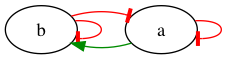

In [70]:
draw_influences.

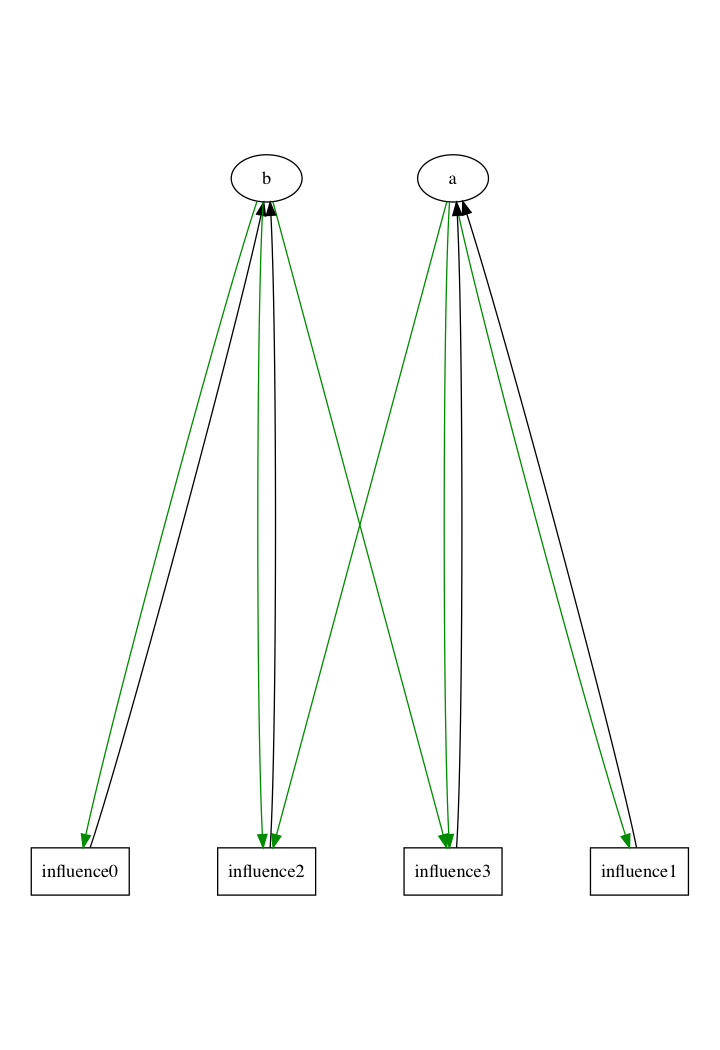

In [71]:
draw_influence_hypergraph.

In [72]:
list_ode.

[0] d(a)/dt=k2*a-k1*a*b
[1] d(b)/dt=k1*a*b-k3*b


In [73]:
numerical_simulation. plot.

In [74]:
seed(1). numerical_simulation(method:ssa). plot.

In [75]:
generate_ctl_not.

reachable(stable(a))
reachable(stable(not a))
reachable(stable(not b))
reachable(steady(b))
checkpoint2(b,not a)
checkpoint2(a,not b)


*In this simple example, the (asynchronous) Boolean semantics of the influence system is the same as for the reaction system, since the Boolean transition system of the reaction system is unitary (only one change of Boolean value can occur at each transition). *

*In general, influence systems with forces are less expressive than reaction systems with rates in the discrete semantics (since they are unitary) but have the same expressive power in the differential semantics.*

*FF, Thierry Martinez, David Rosenblueth, SS. **Influence Systems vs Reaction Systems**. In CMSB'16: Proceedings of the fourteenth international conference on Computational Methods in Systems Biology, volume 9859 of Lecture Notes in BioInformatics. Springer-Verlag, 2016.*

<div id="learning"></div>
## 2017:
- Probably Approximately Correct **PAC learning of influence models**

In [76]:
seed(25). generate_traces(10, 10, traces10x10n).

In [77]:
load_table(traces10x10n1.csv).

In [78]:
plot.

In [79]:
pac_learning({'traces10x10n*.csv'}).

% Maxmimum K used: 1
% minimum number of samples for h=1: 18

% 7 samples (max h ~ 0.3888888888888889)
a,b -< a

% 44 samples (max h ~ 2.4444444444444446)
a -> a

% 24 samples (max h ~ 1.3333333333333333)
b -< b

% 5 samples (max h ~ 0.2777777777777778)
a,b -> b


In [80]:
export_biocham(LVi.bc).

In [81]:
seed(0). generate_traces(1,100, traces1x100n).

In [82]:
load_table(traces1x100n1.csv).

In [83]:
plot.

In [84]:
pac_learning({'traces1x100n*.csv'}).

% Maxmimum K used: 1
% minimum number of samples for h=1: 18

% 32 samples (max h ~ 1.7777777777777777)
a,b -< a

% 35 samples (max h ~ 1.9444444444444444)
a,b -> a

% 12 samples (max h ~ 0.6666666666666666)
a,b -< b

% 21 samples (max h ~ 1.1666666666666667)
a,b -> b


<div id="synthesis"></div>
## 2017:

## CRN synthesis from PIVP function specifications**


### Biochemical implementation of the Cosine function
by compilation of its definition
- by Shannon's GPAC circuit (General Purpose Analog Computer)
- by a PIVP (Polynomial Initial Value Problem) as a function of time
- by a PIVP as a function of some variable x (molecular concentration)

In [85]:
clear_model. option(time:20).

In [86]:
compile_wgpac(y::integral integral-1*y).

In [87]:
present(y,1).

In [88]:
list_model.

fast*[x2]*[y]for _=[x2+y]=>x1.
fast*[x1]for x1=>_.
_=[x1]=>x0.
_=[x0]=>y.
present(x2,-1).
present(y,1).
parameter(
  fast = 1000
).


In [89]:
list_ode.

[0] d(y)/dt=x0
[1] d(x0)/dt=x1
[2] d(x1)/dt=fast*[x2]*[y]-fast*[x1]
[3] d(x2)/dt=0


In [90]:
numerical_simulation.

In [91]:
plot.

In [92]:
clear_model.

In [93]:
compile_from_expression(cos, time, f).

In [94]:
list_model.

_=[z2_p]=>f_p.
_=[z2_m]=>f_m.
_=[f_m]=>z2_p.
_=[f_p]=>z2_m.
fast*z2_m*z2_p for z2_m+z2_p=>_.
fast*f_m*f_p for f_m+f_p=>_.
present(f_p,1).
parameter(
  fast = 1000
).


In [95]:
list_ode.

[0] d(f_p)/dt=z2_p-fast*f_m*f_p
[1] d(f_m)/dt=z2_m-fast*f_m*f_p
[2] d(z2_p)/dt=f_m-fast*z2_m*z2_p
[3] d(z2_m)/dt=f_p-fast*z2_m*z2_p


In [96]:
numerical_simulation.

In [97]:
plot.

In [98]:
numerical_simulation(method:ssa).

In [99]:
plot.

In [100]:
clear_model.

In [101]:
compile_from_expression(cos, x, y).

In [102]:
present(x_p,4).

In [103]:
list_model.

_=[g_m]=>g_p.
_=[x_p]=>g_p.
_=[g_p]=>g_m.
_=[x_m]=>g_m.
_=[g_m+z4_p]=>y_p.
_=[g_p+z4_m]=>y_p.
_=[x_m+z4_m]=>y_p.
_=[x_p+z4_p]=>y_p.
_=[g_m+z4_m]=>y_m.
_=[g_p+z4_p]=>y_m.
_=[x_p+z4_m]=>y_m.
_=[x_m+z4_p]=>y_m.
_=[g_m+y_m]=>z4_p.
_=[g_p+y_p]=>z4_p.
_=[x_p+y_m]=>z4_p.
_=[x_m+y_p]=>z4_p.
_=[g_m+y_p]=>z4_m.
_=[g_p+y_m]=>z4_m.
_=[x_m+y_m]=>z4_m.
_=[x_p+y_p]=>z4_m.
fast*z4_m*z4_p for z4_m+z4_p=>_.
fast*y_m*y_p for y_m+y_p=>_.
fast*g_m*g_p for g_m+g_p=>_.
fast*x_m*x_p for x_m+x_p=>_.
present(y_p,1).
present(x_p,4).
parameter(
  fast = 1000
).


In [104]:
list_ode.

[0] d(x_p)/dt= - (fast*x_m*x_p)
[1] d(x_m)/dt= - (fast*x_m*x_p)
[2] d(g_p)/dt=g_m+x_p-fast*g_m*g_p
[3] d(g_m)/dt=g_p+x_m-fast*g_m*g_p
[4] d(y_p)/dt=g_m*z4_p+g_p*z4_m+x_m*z4_m+x_p*z4_p-fast*y_m*y_p
[5] d(y_m)/dt=g_m*z4_m+g_p*z4_p+x_p*z4_m+x_m*z4_p-fast*y_m*y_p
[6] d(z4_p)/dt=g_m*y_m+g_p*y_p+x_p*y_m+x_m*y_p-fast*z4_m*z4_p
[7] d(z4_m)/dt=g_m*y_p+g_p*y_m+x_m*y_m+x_p*y_p-fast*z4_m*z4_p


In [105]:
numerical_simulation.

In [106]:
plot.

In [107]:
numerical_simulation(method:ssa).

In [108]:
plot.

<div id="sigmoids"></div>
## Compilation of sigmoid functions and comparisons

### Logistic function $1/(1+e^{-t})$

In [109]:
clear_model.

In [110]:
S => 2*S.

In [111]:
S =[S]=> _.

In [112]:
present(S,0.5).

### Hyperbolic tangent

In [113]:
_ => HT.

In [114]:
2*HT => HT.

### Arc tangent

In [115]:
_ => T.

In [116]:
1/(1+T^2) for /T => AT.

### Hill function degree n $H_n=t^n/(k+t^n)$

 MA(n) for NHn =[(n-1)*t+NHn]=> _.

 MA(n*k) for _ =[(n-1)*t+2*NHn]=> Hn.

 present(NHn,1/k).

### Hill function degree 1

In [117]:
MA(1) for NH1 =[NH1]=> _.

In [118]:
MA(1) for _ =[2*NH1]=> H1.

In [119]:
present(NH1,1).

### Hill function degree 2

In [120]:
MA(2) for NH2 =[T+NH2]=> _.

In [121]:
MA(2) for _ =[T+2*NH2]=> H2.

In [122]:
present(NH2,1).

### Hill function degree 5

In [123]:
MA(5) for NH5 =[4*T+NH5]=> _.

In [124]:
MA(5) for _ =[4*T+2*NH5]=> H5.

In [125]:
present(NH5,1).

### Simulations and comparisons

In [126]:
list_model.

_=[S]=>S.
S=[S]=>_.
_=>HT.
HT=[HT]=>_.
_=>T.
1/ (1+T^2)for/T=>AT.
NH1=[NH1]=>_.
_=[2*NH1]=>H1.
MA(2)for NH2=[T+NH2]=>_.
MA(2)for _=[T+2*NH2]=>H2.
MA(5)for NH5=[4*T+NH5]=>_.
MA(5)for _=[4*T+2*NH5]=>H5.
present(S,0.5).
present(NH1,1).
present(NH2,1).
present(NH5,1).


In [127]:
list_ode.

[0] d(H5)/dt=5*T^4*NH5^2
[1] d(NH5)/dt= - (5*T^4*NH5^2)
[2] d(T)/dt=1
[3] d(H2)/dt=2*T*NH2^2
[4] d(NH2)/dt= - (2*T*NH2^2)
[5] d(H1)/dt=NH1^2
[6] d(NH1)/dt= -NH1^2
[7] d(AT)/dt=1/ (1+T^2)
[8] d(/T)/dt= - (1/ (1+T^2))
[9] d(HT)/dt=1-HT^2
[10] d(S)/dt=S-S^2


In [128]:
numerical_simulation.

In [129]:
plot(show:{S,HT,AT,H1,H2,H5}).

In [130]:
numerical_simulation(method:ssa).

In [131]:
plot(show:{S,HT,AT,H1,H2,H5}).

<div id="mapk"></div>
### Comparison to MAPK input/ouput sigmoid functions

### Compiler-generated reactions for Hill function of degree 2 as function of time

In [132]:
clear_model.

In [133]:
compile_from_expression(id*id/(1+id*id),time,y).

In [134]:
list_model.

_=[z4_m+z5_m]=>y_p.
_=[z4_p+z5_p]=>y_p.
_=[z3_m+z5_m]=>y_p.
_=[z3_p+z5_p]=>y_p.
_=[z2_m+2*z5_m+z10_p]=>y_p.
_=[z2_m+2*z5_m+z9_p]=>y_p.
2*z2_m*z5_m*z5_p*z10_m for _=[z2_m+z5_m+z5_p+z10_m]=>y_p.
2*z2_m*z5_m*z5_p*z9_m for _=[z2_m+z5_m+z5_p+z9_m]=>y_p.
_=[z2_m+2*z5_p+z10_p]=>y_p.
_=[z2_m+2*z5_p+z9_p]=>y_p.
_=[z2_p+2*z5_m+z10_m]=>y_p.
_=[z2_p+2*z5_m+z9_m]=>y_p.
2*z2_p*z5_m*z5_p*z10_p for _=[z2_p+z5_m+z5_p+z10_p]=>y_p.
2*z2_p*z5_m*z5_p*z9_p for _=[z2_p+z5_m+z5_p+z9_p]=>y_p.
_=[z2_p+2*z5_p+z10_m]=>y_p.
_=[z2_p+2*z5_p+z9_m]=>y_p.
_=[z4_m+z5_p]=>y_m.
_=[z4_p+z5_m]=>y_m.
_=[z3_m+z5_p]=>y_m.
_=[z3_p+z5_m]=>y_m.
_=[z2_m+2*z5_m+z10_m]=>y_m.
_=[z2_m+2*z5_m+z9_m]=>y_m.
2*z2_m*z5_m*z5_p*z10_p for _=[z2_m+z5_m+z5_p+z10_p]=>y_m.
2*z2_m*z5_m*z5_p*z9_p for _=[z2_m+z5_m+z5_p+z9_p]=>y_m.
_=[z2_m+2*z5_p+z10_m]=>y_m.
_=[z2_m+2*z5_p+z9_m]=>y_m.
_=[z2_p+2*z5_m+z10_p]=>y_m.
_=[z2_p+2*z5_m+z9_p]=>y_m.
2*z2_p*z5_m*z5_p*z10_m for _=[z2_p+z5_m+z5_p+z10_m]=>y_m.
2*z2_p*z5_m*z5_p*z9_m for _=[z2_p+z5_m+z5_p+z9_m]=>y_m.

In [135]:
list_ode.

[0] d(y_p)/dt=z4_m*z5_m+z4_p*z5_p+z3_m*z5_m+z3_p*z5_p+z2_m*z5_m^2*z10_p+z2_m*z5_m^2*z9_p+2*z2_m*z5_m*z5_p*z10_m+2*z2_m*z5_m*z5_p*z9_m+z2_m*z5_p^2*z10_p+z2_m*z5_p^2*z9_p+z2_p*z5_m^2*z10_m+z2_p*z5_m^2*z9_m+2*z2_p*z5_m*z5_p*z10_p+2*z2_p*z5_m*z5_p*z9_p+z2_p*z5_p^2*z10_m+z2_p*z5_p^2*z9_m-fast*y_m*y_p
[1] d(y_m)/dt=z4_m*z5_p+z4_p*z5_m+z3_m*z5_p+z3_p*z5_m+z2_m*z5_m^2*z10_m+z2_m*z5_m^2*z9_m+2*z2_m*z5_m*z5_p*z10_p+2*z2_m*z5_m*z5_p*z9_p+z2_m*z5_p^2*z10_m+z2_m*z5_p^2*z9_m+z2_p*z5_m^2*z10_p+z2_p*z5_m^2*z9_p+2*z2_p*z5_m*z5_p*z10_m+2*z2_p*z5_m*z5_p*z9_m+z2_p*z5_p^2*z10_p+z2_p*z5_p^2*z9_p-fast*y_m*y_p
[2] d(z2_p)/dt=z4_p+z3_p-fast*z2_m*z2_p
[3] d(z2_m)/dt=z4_m+z3_m-fast*z2_m*z2_p
[4] d(z3_p)/dt=1-fast*z3_m*z3_p
[5] d(z3_m)/dt= - (fast*z3_m*z3_p)
[6] d(z4_p)/dt=1-fast*z4_m*z4_p
[7] d(z4_m)/dt= - (fast*z4_m*z4_p)
[8] d(z5_p)/dt=z5_m^2*z10_m+z5_m^2*z9_m+2*z5_m*z5_p*z10_p+2*z5_m*z5_p*z9_p+z5_p^2*z10_m+z5_p^2*z9_m-fast*z5_m*z5_p
[9] d(z5_m)/dt=z5_m^2*z10_p+z5_m^2*z9_p+2*z5_m*z5_p*z10_m+2*z5_m*z5_p*z9_m+z5

In [136]:
numerical_simulation.

In [137]:
plot(show:{y_p}).

In [138]:
plot.

## Compiler-generated reactions for Hill function of degree 2 as a function of input u

In [139]:
clear_model.

In [140]:
compile_from_expression(id*id/(1+id*id),u,y).

In [141]:
present(u_p,4).

In [142]:
list_model.

_=[g_m]=>g_p.
_=[u_p]=>g_p.
_=[g_p]=>g_m.
_=[u_m]=>g_m.
_=[g_m+z6_m+z7_m]=>y_p.
_=[g_m+z6_p+z7_p]=>y_p.
_=[g_m+z5_m+z7_m]=>y_p.
_=[g_m+z5_p+z7_p]=>y_p.
_=[g_m+z4_m+2*z7_m+z12_p]=>y_p.
_=[g_m+z4_m+2*z7_m+z11_p]=>y_p.
2*g_m*z4_m*z7_m*z7_p*z12_m for _=[g_m+z4_m+z7_m+z7_p+z12_m]=>y_p.
2*g_m*z4_m*z7_m*z7_p*z11_m for _=[g_m+z4_m+z7_m+z7_p+z11_m]=>y_p.
_=[g_m+z4_m+2*z7_p+z12_p]=>y_p.
_=[g_m+z4_m+2*z7_p+z11_p]=>y_p.
_=[g_m+z4_p+2*z7_m+z12_m]=>y_p.
_=[g_m+z4_p+2*z7_m+z11_m]=>y_p.
2*g_m*z4_p*z7_m*z7_p*z12_p for _=[g_m+z4_p+z7_m+z7_p+z12_p]=>y_p.
2*g_m*z4_p*z7_m*z7_p*z11_p for _=[g_m+z4_p+z7_m+z7_p+z11_p]=>y_p.
_=[g_m+z4_p+2*z7_p+z12_m]=>y_p.
_=[g_m+z4_p+2*z7_p+z11_m]=>y_p.
_=[g_p+z6_m+z7_p]=>y_p.
_=[g_p+z6_p+z7_m]=>y_p.
_=[g_p+z5_m+z7_p]=>y_p.
_=[g_p+z5_p+z7_m]=>y_p.
_=[g_p+z4_m+2*z7_m+z12_m]=>y_p.
_=[g_p+z4_m+2*z7_m+z11_m]=>y_p.
2*g_p*z4_m*z7_m*z7_p*z12_p for _=[g_p+z4_m+z7_m+z7_p+z12_p]=>y_p.
2*g_p*z4_m*z7_m*z7_p*z11_p for _=[g_p+z4_m+z7_m+z7_p+z11_p]=>y_p.
_=[g_p+z4_m+2*z7_p+z12_m]=>y_p.
_=[g

In [143]:
list_ode.

[0] d(u_p)/dt= - (fast*u_m*u_p)
[1] d(u_m)/dt= - (fast*u_m*u_p)
[2] d(g_p)/dt=g_m+u_p-fast*g_m*g_p
[3] d(g_m)/dt=g_p+u_m-fast*g_m*g_p
[4] d(y_p)/dt=g_m*z6_m*z7_m+g_m*z6_p*z7_p+g_m*z5_m*z7_m+g_m*z5_p*z7_p+g_m*z4_m*z7_m^2*z12_p+g_m*z4_m*z7_m^2*z11_p+2*g_m*z4_m*z7_m*z7_p*z12_m+2*g_m*z4_m*z7_m*z7_p*z11_m+g_m*z4_m*z7_p^2*z12_p+g_m*z4_m*z7_p^2*z11_p+g_m*z4_p*z7_m^2*z12_m+g_m*z4_p*z7_m^2*z11_m+2*g_m*z4_p*z7_m*z7_p*z12_p+2*g_m*z4_p*z7_m*z7_p*z11_p+g_m*z4_p*z7_p^2*z12_m+g_m*z4_p*z7_p^2*z11_m+g_p*z6_m*z7_p+g_p*z6_p*z7_m+g_p*z5_m*z7_p+g_p*z5_p*z7_m+g_p*z4_m*z7_m^2*z12_m+g_p*z4_m*z7_m^2*z11_m+2*g_p*z4_m*z7_m*z7_p*z12_p+2*g_p*z4_m*z7_m*z7_p*z11_p+g_p*z4_m*z7_p^2*z12_m+g_p*z4_m*z7_p^2*z11_m+g_p*z4_p*z7_m^2*z12_p+g_p*z4_p*z7_m^2*z11_p+2*g_p*z4_p*z7_m*z7_p*z12_m+2*g_p*z4_p*z7_m*z7_p*z11_m+g_p*z4_p*z7_p^2*z12_p+g_p*z4_p*z7_p^2*z11_p+u_p*z6_m*z7_m+u_m*z6_m*z7_p+u_m*z6_p*z7_m+u_p*z6_p*z7_p+u_p*z5_m*z7_m+u_m*z5_m*z7_p+u_m*z5_p*z7_m+u_p*z5_p*z7_p+u_m*z4_m*z7_m^2*z12_m+u_p*z4_m*z7_m^2*z12_p+u_m*z4_m*z7_m^2*

In [144]:
numerical_simulation.

In [145]:
plot.

In [146]:
dose_response(u_p, 0, 5, time: 1000, show:{y_p}).

## BIOCHAM the next 15 years ?
### Formal specification of biological functions by mixed analog-digital programs (MADPs)
### Compilation of MADPs using robust design principles for CRNs
### Comparison between synthesized and evolved natural CRNs
### Modeling CRN evolution
### Spatial semantics (reaction-diffusion multi-agent simulation)
### Cell population models

### *suggestions ?*